---

# Integrated Project 1

The data below is information I have collected while looking at the information provided Ice, a videogame store. I have assessed a sample of 16,000+ entries and concluded with ideas for the advertising company. 

**Table of Contents** <br>
1.1 [General Information](#general) - The dataframe at first glance <br>
&emsp; 1.1.1 [Conclusion](#gencon) - Listing changes that need to be made <br>
<br>
1.2 [Data Preprocessing](#dp) - Preparing the data<br>
&emsp; 1.2.1 [Conclusion](#dpcon) - Overall conclusion<br>
<br>

1.3 [Data Analysis](#da) - Analyzing the data<br>
&emsp; 1.3.1 [Yearly Sales](#ysales)<br>
&emsp; 1.3.2 [Platform Sales](#psales)<br>
&emsp; 1.3.3 [High-Performing Platforms](#hp)<br>
&emsp;&emsp; 1.3.3.1 [PS2](#ps2)<br>
&emsp;&emsp; 1.3.3.2 [PS3](#ps3)<br>
&emsp;&emsp; 1.3.3.3 [Wii](#wii)<br>
&emsp;&emsp; 1.3.3.4 [X360](#x360)<br>
&emsp; 1.3.4 [Low-Performing Platforms](#lp)<br>
&emsp; 1.3.5 [Global Platform Sales](#gps)<br>
&emsp; 1.3.6 [Average Platform Sales](#aps)<br>
&emsp; 1.3.7 [How reviews impact sales](#ar)<br>
&emsp;&emsp; 1.3.7.1 [Conclusion](#arc)<br>
&emsp; 1.3.8 [Games by Genre](#ar)<br>
&emsp;&emsp; 1.3.8.1 [Conclusion](#arc)<br>
&emsp; 1.3.9 [Region Profile](#rp)<br>
&emsp;&emsp; 1.3.9.1 [Conclusion](#rcon)<br>
&emsp; 1.4 [Testing the Hypothesis](#rp)<br>

<div class="alert alert-success">
<b>Reviewer's comment:</b> Excellent introduction!
</div>

##  <a id='general'>General Information</a>

In [32]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


======= Amount Missing =======
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
dtype: int64


======= Percent Missing =======
Name                0.011965
Genre               0.011965
Year_o

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


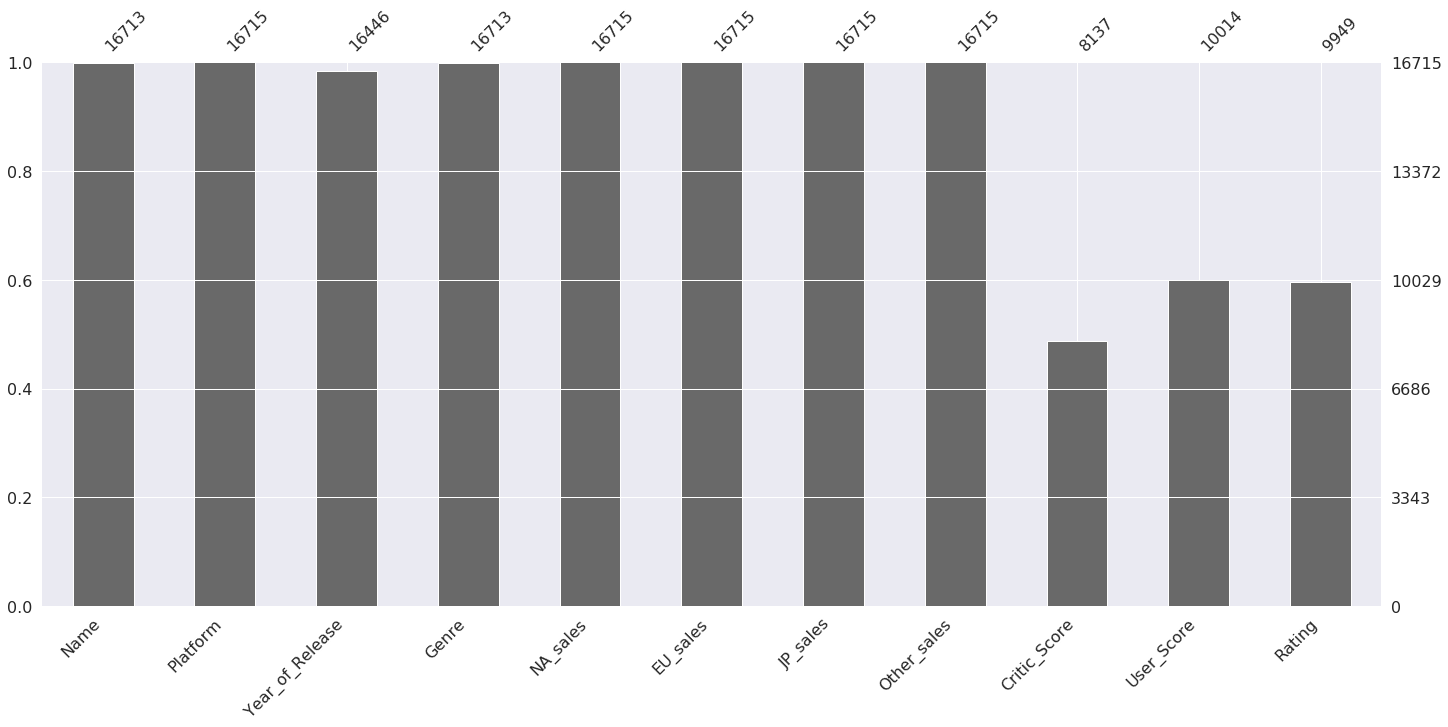

In [33]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pylab as plt
import seaborn as sb
from scipy import stats
%matplotlib inline
import math
import sys
from scipy import stats as st
from scipy.stats import levene
import numpy as np
import pandas as pd

df = pd.read_csv("/datasets/games.csv")
df.info()
print("\n")
#Finding out sum & percentage of missing values in each feature.
print("======= Amount Missing =======")
missing_values_count = df.isnull().sum()
print(missing_values_count[0:10])
print("\n")
print("======= Percent Missing =======")
null = (df.isna().sum()/len(df)) * 100
print(null[null>0].sort_values())
print("\n")
display(df.head())
msno.bar(df)
plt.show()

### <a id='gencon'> Conclusion</a>

After analyzing the csv in excel as well as viewing the results for the amount/ percent missing, the following changes need to be made. 

**1**. Make all column names lowercase: currently there exists column names with a mixture of uppercase and lowercase. <br>
**2**. Convert the column types: <br>
&emsp;- `Year_of_Release` from float to int<br>
&emsp;- `Critic_Score` from float to int<br>
&emsp;- `User_Score` from object to float<br>
**3**. Filling in missing data: There exists missing data for the `Critic Score`, `User_Score`, and `Rating` columns. Possible ways to remedy this is to look at the scores of other games that fall under the same plaform & genre. 

## <a id='dp'>Data Preprocessing</a>

In [34]:
#1. Make all column names lower case
df.columns = map(str.lower, df.columns)

# Dropping missing values and converting data types
df.dropna(subset=['genre', 'year_of_release', 'genre'], inplace=True)
df['year_of_release'] = df['year_of_release'].astype('Int64')


print("======= Amount Missing =======")
missing_values_count = df.isnull().sum()
print(missing_values_count[0:10])
print("\n")
df.info()

======= Amount Missing =======
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
dtype: int64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null Int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB


In [35]:
# Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.
def tot_sales(row):
    NA = row['na_sales']
    EU = row['eu_sales']
    JP = row['jp_sales']
    OS = row['other_sales']
    
    tot_sales = NA+EU+JP+OS
    return tot_sales

row_values = 4
row = pd.Series(data=row_values, index=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'])
tot_sales(row)
df['total_sales'] = df.apply(tot_sales, axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [36]:
#'NES', 'SNES', 'N64', '2600', 'PSV', 'SAT', 'WS', 'NG', 'TG16', 'GG', 'PCFX', '3DO', 'SCD', 'GB'
n = ['NES', 'SNES', 'N64', '2600', 'PSV', 'SAT', 'WS', 'NG', 'TG16', 'GG', 'PCFX', '3DO', 'SCD', 'GB', 'GEN']
new_df = df[~df["platform"].isin(n)] 

In [37]:
new_df['user_score'] = new_df['user_score'].replace('tbd', np.NaN)
dft = new_df.query('user_score.notna()')
df_typical_user_ratio_by_platform = dft.groupby(['platform', 'genre'])['user_score'].apply(lambda x: x.sample(1).iloc[0])

def correct_user_score(row):
    platform = row['platform']
    genre = row['genre']
    if (row['user_score'] == 'tbd' or pd.isnull(row['user_score'])):
        u = df_typical_user_ratio_by_platform.loc[[platform, genre]].head(1).astype('float')
        uScore = ", ".join(map(str, u))        
    else:
        uScore = row['user_score']
        
    return uScore

row = pd.Series(data=row_values, index=['user_score', 'platform', 'genre'])
correct_user_score(row)
new_df['user_score'] = new_df.apply(correct_user_score, axis=1)
new_df.user_score = new_df.user_score.astype('float')
new_df.sample(40)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15156,DemiKids: Light Version,GBA,2002,Role-Playing,0.02,0.01,0.00,0.00,62.0,8.3,E,0.03
7792,Shrek: Forever After,PS3,2010,Platform,0.16,0.02,0.00,0.02,57.0,4.5,E10+,0.20
1999,The Simpsons Game,X360,2007,Action,0.54,0.39,0.00,0.11,71.0,7.7,T,1.04
3981,Rooms: The Main Building,DS,2010,Adventure,0.10,0.34,0.01,0.05,56.0,5.4,E,0.50
6335,One Piece Unlimited Cruise 1: The Treasure Ben...,Wii,2008,Adventure,0.00,0.07,0.19,0.01,NaN,9.0,NaN,0.27
10575,Karaoke Revolution,PS3,2009,Misc,0.07,0.02,0.00,0.01,66.0,6.1,T,0.10
13839,Akko ni Omakase! Brain Shock,DS,2006,Misc,0.00,0.00,0.04,0.00,NaN,5.4,NaN,0.04
1235,NASCAR 99,PS,1998,Racing,1.45,0.04,0.00,0.04,NaN,6.3,NaN,1.53
1526,Namco Museum DS,DS,2007,Misc,1.13,0.01,0.06,0.09,67.0,5.9,E,1.29
9374,Life is Strange,XOne,2016,Adventure,0.09,0.03,0.00,0.01,85.0,8.7,M,0.13


In [38]:
cs = new_df.query('critic_score != "NaN"')

df_typical_critic_ratio_by_platform = cs.groupby(['platform'])['critic_score'].apply(lambda x: x.sample(1).iloc[0])

#df_typical_critic_ratio_by_platform
def correct_critic_score(row):
    platform = row['platform']
    if pd.isnull(row['critic_score']):
        c = df_typical_critic_ratio_by_platform.loc[platform]
        cScore = c
    else:
        cScore = row['critic_score']
    return cScore

row = pd.Series(data=row_values, index=['critic_score', 'platform'])
correct_critic_score(row)
new_df['critic_score'] = new_df.apply(correct_critic_score, axis=1)
new_df.sample(50)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14354,Game of Thrones (Telltale),XOne,2015,Adventure,0.03,0.00,0.00,0.00,86.0,4.1,NaN,0.03
10411,Rock Revolution,DS,2008,Misc,0.10,0.00,0.00,0.01,80.0,6.8,E10+,0.11
3073,Suikoden IV,PS2,2004,Role-Playing,0.17,0.13,0.30,0.05,63.0,7.3,T,0.65
1181,Guitar Hero: On Tour Decades,DS,2008,Misc,0.84,0.57,0.00,0.16,72.0,8.0,E10+,1.57
11387,Death Jr. and the Science Fair of Doom,DS,2007,Platform,0.08,0.00,0.00,0.01,47.0,7.5,E10+,0.09
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,66.0,7.0,NaN,0.01
15166,QUIZ PARTY,Wii,2012,Misc,0.00,0.02,0.00,0.00,71.0,9.0,NaN,0.02
15201,Brandish: The Dark Revenant,PSP,2009,Role-Playing,0.00,0.00,0.02,0.00,78.0,8.3,T,0.02
5400,Naruto Shippuden: Ultimate Ninja Impact,PSP,2011,Fighting,0.09,0.07,0.15,0.04,59.0,7.2,T,0.35
10121,Yu Yu Hakusho: Tournament Tactics,GBA,2004,Strategy,0.08,0.03,0.00,0.00,66.0,6.8,E,0.11


### <a id='dpcon'> Conclusion</a>

In the previous function, I displayed the column names and the amount of data missing in each column and their percentage. In our dataframe there are two games that have no names (this could be due to human error). I have decided to drop those games as it represented 0.011965% of the total data. I chose to also drop the missing data from `year_of_release` and `genre` as the missing values represented 1.609333% and 0.011965% of the data respectively. The percent missing from the `genre` column matches those missing in the `name` column so it is safe to assume they are from the same game.
<br>
`user_score`, `rating`, and `critic_score` columns were a bit harder to fill in as dropping them would result in a huge loss of data.

I decided to take the mean of that specific platform. Further investigation led me to realize the platforms 2600, 3D0, GB, GEN, GG, N64, NES, NG, PCFX, SAT, SCD, SNES, TG16, and WS had no data and dropping them would result in a minimal loss of my data.

To fill in the tbds and NaNs in critic_score and user_score, I decided to take the mean user and critic score for the specific game and genre. 

## <a id='da'>Data Analysis</a>

---

### <a id='ysales'> Yearly Sales</a>

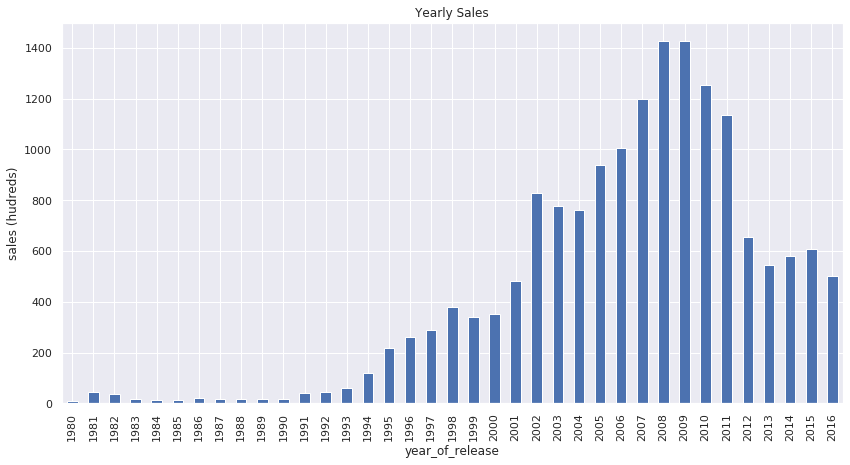

In [39]:
yearly = df.groupby('year_of_release')['name'].count()
y = yearly.plot.bar(x='games', y='count', figsize=(14,7))
y.set_title("Yearly Sales")
y.set_ylabel("sales (hudreds)")
plt.show()

There exists a influx in game sales from 2001-2010.

### <a id='psales'> Platform Sales</a>

In [40]:
ps = df.groupby('platform')['total_sales'].agg({'total_sales': 'sum'})
ps.reset_index()
high_prof = ps.loc[ps['total_sales'] > 500]
high_prof

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


,total_sales
platform,
DS,802.78
PS,727.58
PS2,1233.56
PS3,931.34
Wii,891.18
X360,961.24


### <a id='hp'>High Performing Platforms </a>

PS2, PS3, Wii, and X360 are the top performing platforms. We now examine the games on their platforms.

####  <a id='ps2'> PS2 </a>

In [41]:
ps2 = df.loc[df['platform'] == 'PS2']
ps2.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


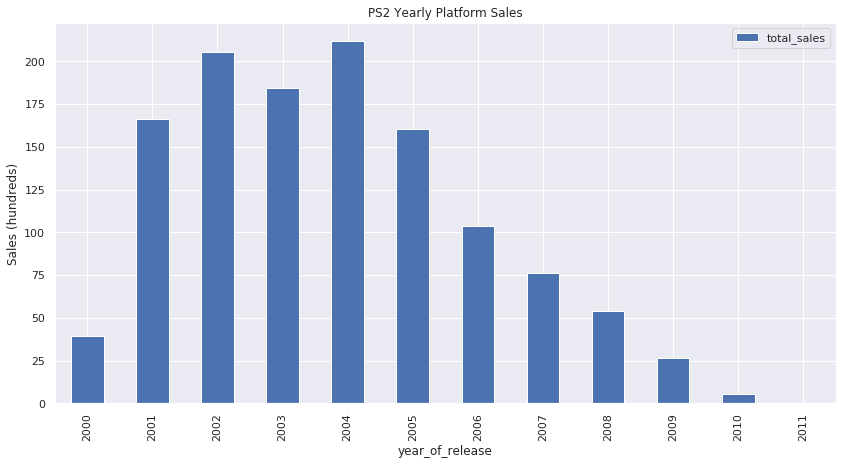

In [42]:
y_dist = ps2.groupby('year_of_release')['total_sales'].agg({'total_sales': 'sum'})
y_plot = y_dist.plot.bar(figsize=(14,7))
y_plot.set_title("PS2 Yearly Platform Sales")
y_plot.set_ylabel("Sales (hundreds)")
plt.show()

PS2 saw a rise in sales in 2001 and a decline in sales after 2005.

#### <a id='ps3'> PS3 </a>

In [43]:
ps3 = df.loc[df['platform'] == 'PS3']
ps3.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
54,Gran Turismo 5,PS3,2010,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


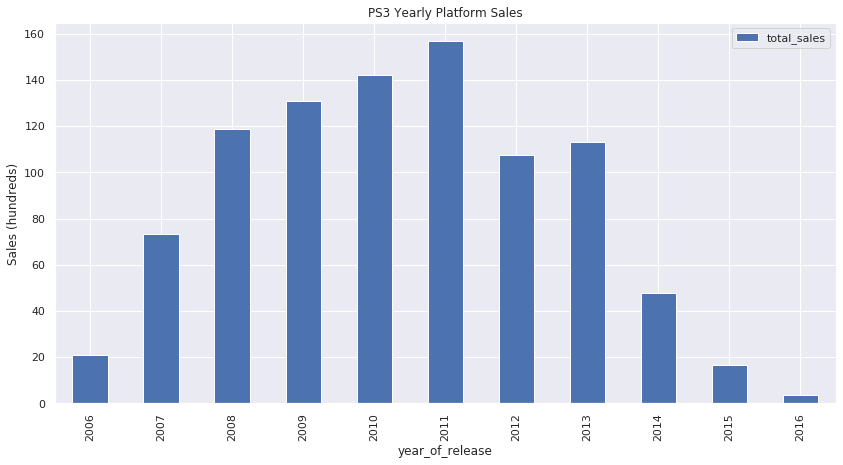

In [44]:
y_dist = ps3.groupby('year_of_release')['total_sales'].agg({'total_sales': 'sum'})
y = y_dist.plot.bar(figsize=(14,7))
y.set_title("PS3 Yearly Platform Sales")
y.set_ylabel("Sales (hundreds)")
plt.show()

PS3 saw an increase in sales in 2008 which peaked in 2011 and declined that same year. 

#### <a id='wii'> Wii </a>

In [45]:
wii = df.loc[df['platform'] == 'Wii']
wii.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


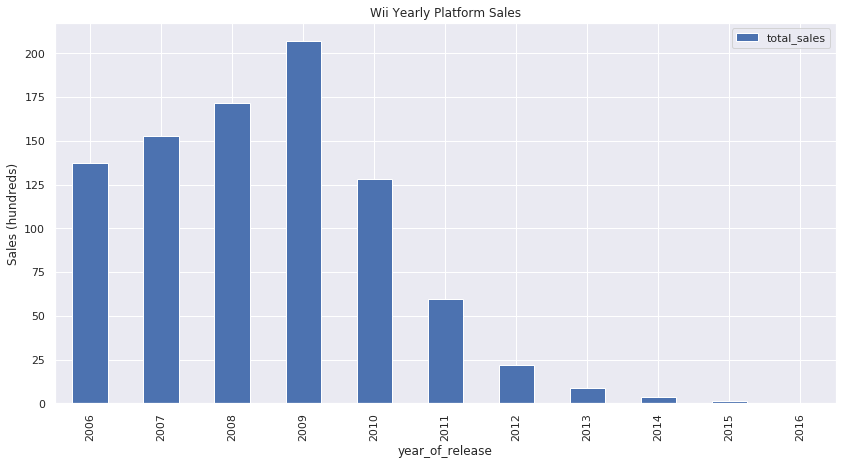

In [46]:
y_dist = wii.groupby('year_of_release')['total_sales'].agg({'total_sales': 'sum'})
y = y_dist.plot.bar(figsize=(14,7))
y.set_title("Wii Yearly Platform Sales")
y.set_ylabel("Sales (hundreds)")
plt.show()

Wii rose to fame from 2006 to 2009 and declined after that year.

#### <a id='x360'> X360 </a>

In [47]:
x360 = df.loc[df['platform'] == 'X360']
x360.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


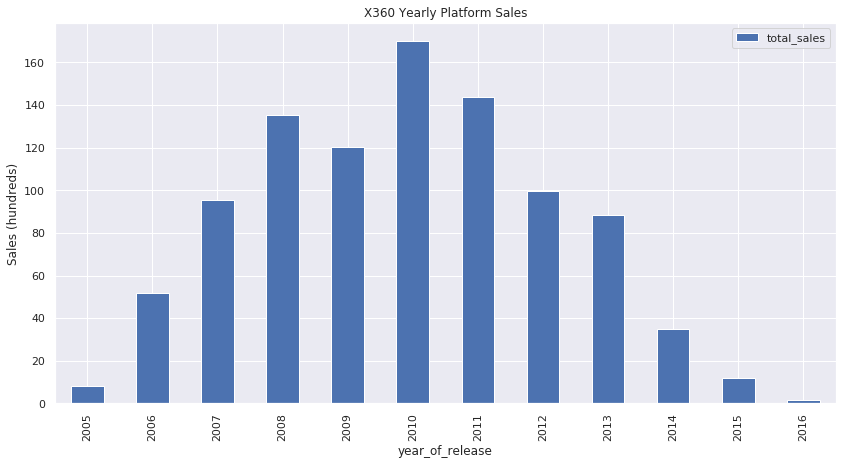

In [48]:
y_dist = x360.groupby('year_of_release')['total_sales'].agg({'total_sales': 'sum'})
y = y_dist.plot.bar(figsize=(14,7))
y.set_title("X360 Yearly Platform Sales")
y.set_ylabel("Sales (hundreds)")
plt.show()

X360 saw a rise in sales in 2007, it peaked in 2010 and declined after 2010.

### <a id='lp'> Low Performing Platforms </a>

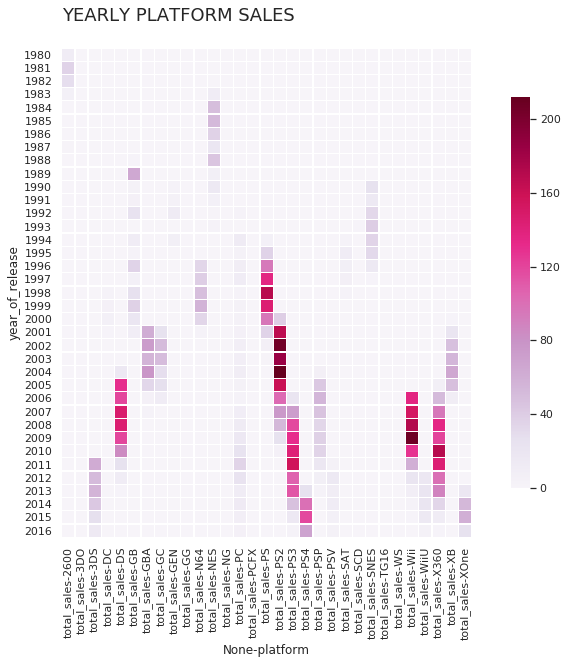

In [49]:
plat = df.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'})
plat_u = plat.unstack(level=0).fillna(0)

fig, ax = plt.subplots()
fig.set_size_inches(14, 9)
sb.heatmap(plat_u, cmap="PuRd", square=True, linewidth=0.3, cbar_kws={"shrink": .8})
title = 'YEARLY PLATFORM SALES\n'
plt.title(title, loc='left', fontsize=18)
plt.show()

Platforms that used to be popular but now have zero sales include PS2, PS3, Wii, and X360. It tales approximately four years for  new platforms to appear and get popular and about 3 - 4 years for popular platforms to fade. 

Based on the previous questions, I am going to analyze the data from 2014-2016 to make predictions about 2017. In 2014, most platforms had faded away, but PS4 was about to hit its peak. Xone and 3DS still had some sales, but would soon become less popular as the years went on.

### <a id='gps'> Global Platform Sales </a>

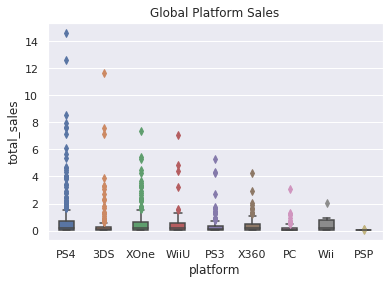

In [50]:
# build a box plot for the global sales of all games broken down by platform
gplatform_pred = new_df[new_df['year_of_release'] >= 2014]
gplatform_pred


ax = sb.boxplot(x="platform", y="total_sales", data=gplatform_pred, width=.4)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
sb.set(rc={'figure.figsize':(15, 8)})
ax.set_title("Global Platform Sales")
plt.show()

NOTE: I tried to add a legend, but it minimized the entire graph significantly. 

Conclusion: The boxplot of global platform sales shows PS4 leading in sales during this period with 3DS and XOne

### <a id='aps'> Average Platform Sales </a>

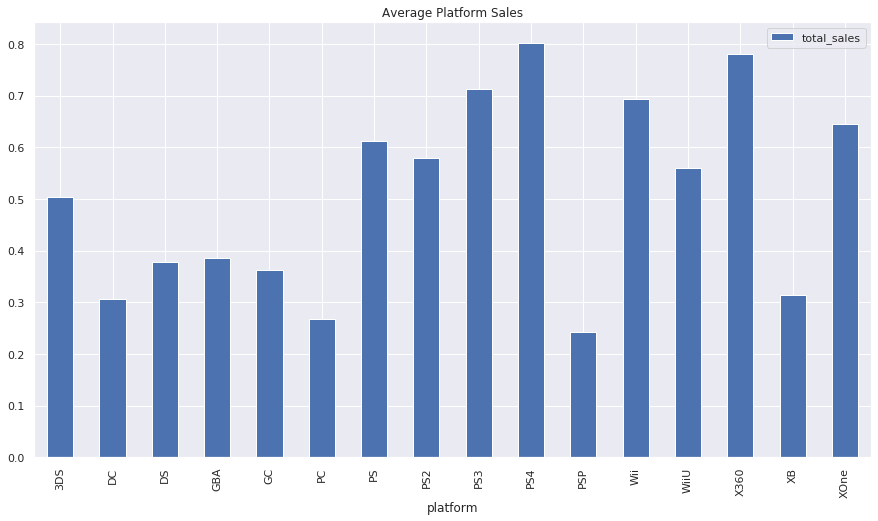

In [51]:
avgplat = new_df.groupby(['platform']).agg({'total_sales': 'mean'})
plot = avgplat.plot(kind="bar")
plot.set_title("Average Platform Sales")
plt.show()


PS4, X360, PS3 and Wii are leading in average platform sales.

### <a id='ar'> Assessing how reviews impact sales </a>

To assess how reviews impact sales, I will be looking at the platform "PS2" as it one of the popular platforms.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1, 'Correlation Heatmap')

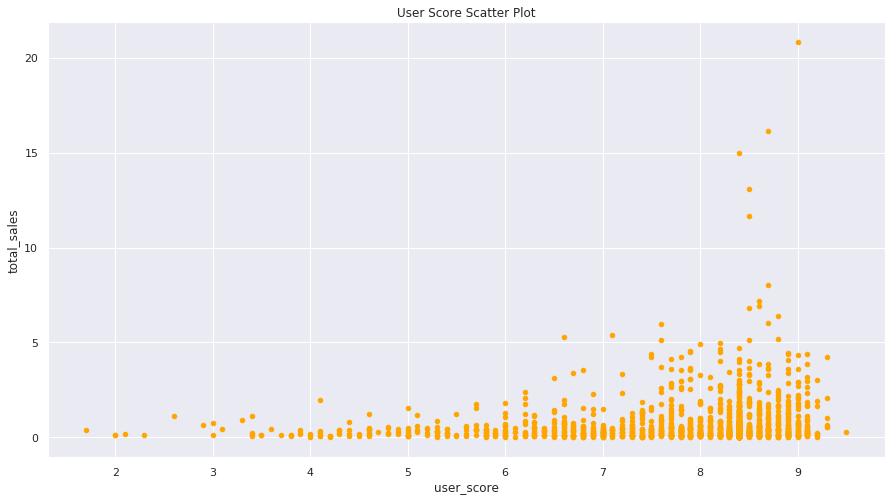

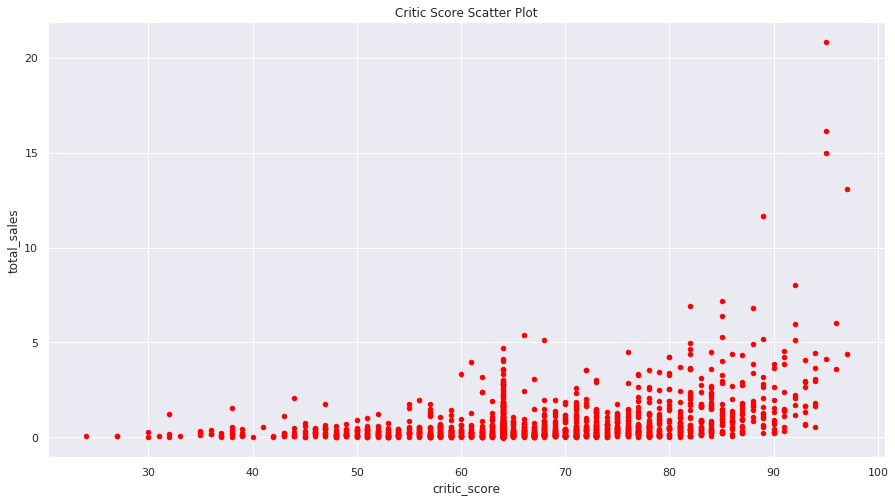

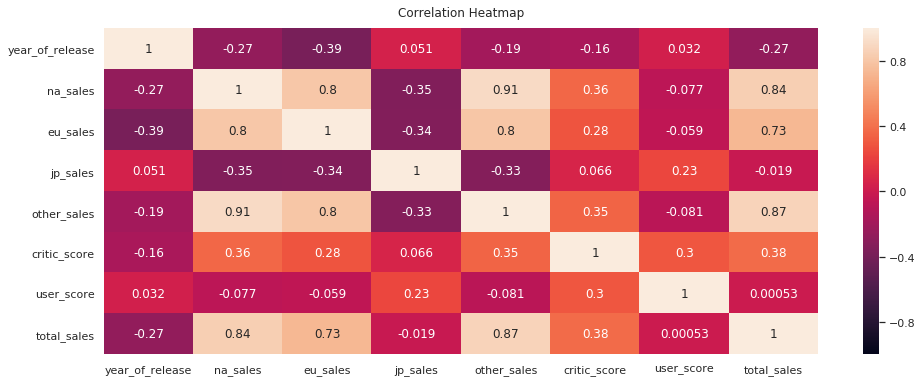

In [52]:
ps2 = new_df.loc[new_df['platform'] == 'PS2']
ps2['user_score'] = ps2['user_score'].astype('float')
scatter_us = ps2.plot.scatter(x='user_score', y='total_sales', c='orange')
scatter_cs = ps2.plot.scatter(x='critic_score', y='total_sales', c='red')
scatter_us.set_title("User Score Scatter Plot")
scatter_cs.set_title("Critic Score Scatter Plot")
plt.figure(figsize=(16, 6))
heatmap = sb.heatmap(ps2.corr(method="spearman"), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

#### <a id='arc'> Conclusion </a>

In the user score scatter plot, the total sales increased once the user score surpassed 6 meaning, if a game scored a 6 and above, the platform would see more sales. The same could be said for the critic score. Once the critic score surpassed 60, total sales increased. 

In the correlation heatmap, the correlation between user score and total sales is -0.05. This indicates little to no correlation. The correlation between critic score and total sales is 0.42 which is stronger, suggesting critic scores have more of an impact on total sales. There exists a correlation, but it is very weak.

Assessing the total sales for other platforms

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


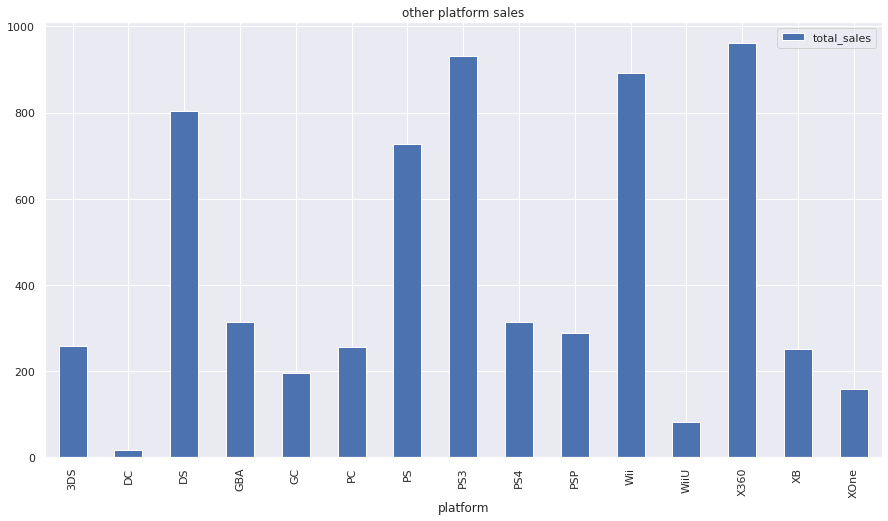

In [53]:
new_df['user_score'] = new_df['user_score'].astype('float')
other = new_df.query('platform != "PS2"')
other_game_sales = other.groupby('platform').agg({'total_sales':'sum'})
other_game_sales.plot(kind='bar', title='other platform sales')

### <a id='gbg'>Games by Genre </a>

In [54]:
games_by_genre = df.groupby('genre').agg({'total_sales':'sum', 'name':'count'})
games_by_genre.sort_values(by='total_sales', ascending=False)

,total_sales,name
genre,,
Action,1716.52,3307
Sports,1309.67,2306
Shooter,1041.36,1296
Role-Playing,931.08,1481
Platform,825.55,878
Misc,790.29,1721
Racing,723.49,1226
Fighting,442.66,837
Simulation,387.96,857


#### <a id='gbgc'>Conclusion </a>

If profitable genres were classified as genres with sales over $500, the most profitable genres are **Action, Sports, Shooter and Roleplaying**.  It is evident that the reason why these genres are profitable is because they release the most games.

Step 4. Create a user profile for each region
For each region (NA, EU, JP), determine:
The top five platforms. Describe variations in their market shares from region to region.
The top five genres. Explain the difference.
Do ESRB ratings affect sales in individual regions?


### <a id='na'> Region Profile </a>

In [55]:
by_region = df.groupby("platform").agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum', 'other_sales': 'sum'})
by_region

,na_sales,eu_sales,jp_sales,other_sales
platform,,,,
2600,80.78,4.86,0.00,0.84
3DO,0.00,0.00,0.10,0.00
3DS,82.65,61.27,100.62,13.27
DC,5.43,1.69,8.56,0.27
DS,380.31,188.41,175.02,59.04
GB,113.64,47.51,85.12,8.16
GBA,184.12,74.59,46.56,7.61
GC,131.94,38.32,21.34,5.13
GEN,19.27,5.52,2.67,0.89


The top five platforms:
<br>
**NA district**: X360, PS2, Wii, PS3, and DS <br>
**EU district**: PS3, PS2, X360, Wii, and PS4 <br>
**JP district**: DS, PS2, PS3, Wii, and 3DS <br>
**Other districts**: PS2, PS3, X360, Wii, and DS <br>

Checking if ESRB ratings have an affect on sales.

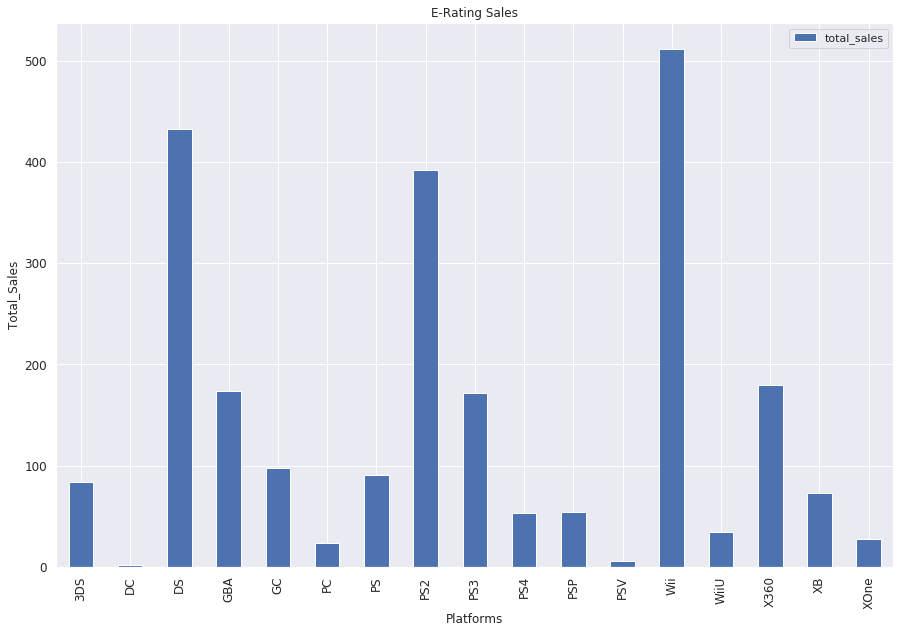

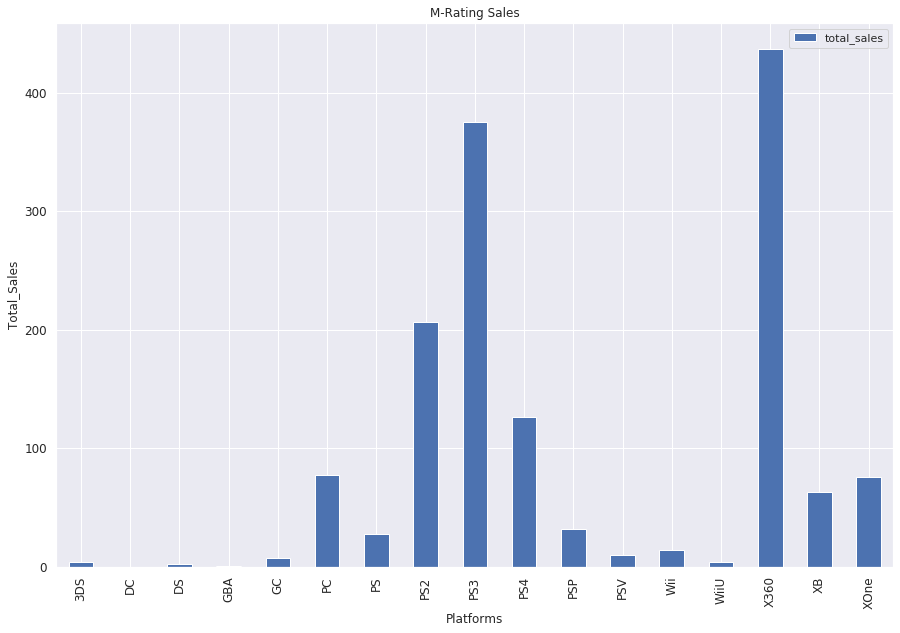

In [56]:
specific_rate = df.groupby("rating")
E = specific_rate.get_group("E")
M = specific_rate.get_group("M")
T = specific_rate.get_group("T")
E10 = specific_rate.get_group("E10+")
AO = specific_rate.get_group("AO")
KA = specific_rate.get_group("K-A")
RP = specific_rate.get_group("RP")

E_sales = E.groupby('platform').agg({'total_sales':'sum'})
ax = E_sales.plot(kind='bar', title ="E-Rating Sales", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Platforms", fontsize=12)
ax.set_ylabel("Total_Sales", fontsize=12)

M_sales = M.groupby('platform').agg({'total_sales':'sum'})
ax = M_sales.plot(kind='bar', title ="M-Rating Sales", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Platforms", fontsize=12)
ax.set_ylabel("Total_Sales", fontsize=12)
plt.show()


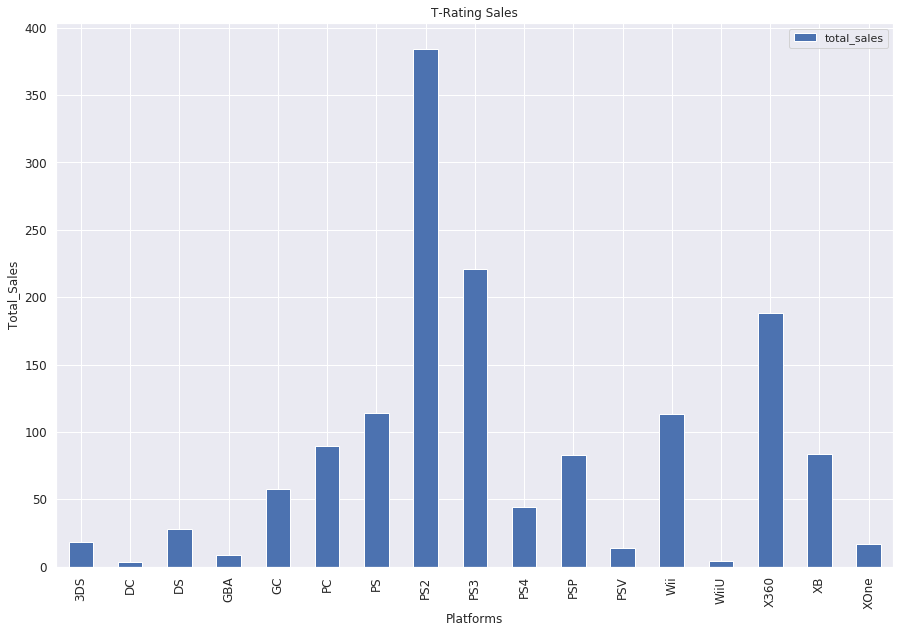

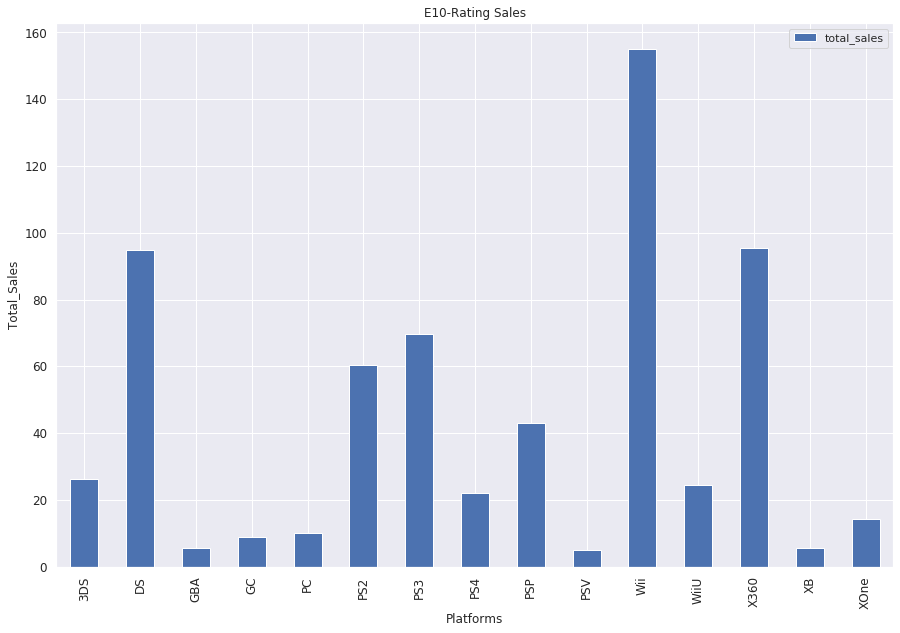

In [57]:
T_sales = T.groupby('platform').agg({'total_sales':'sum'})
ax = T_sales.plot(kind='bar', title ="T-Rating Sales", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Platforms", fontsize=12)
ax.set_ylabel("Total_Sales", fontsize=12)


E10_sales = E10.groupby('platform').agg({'total_sales':'sum'})
ax = E10_sales.plot(kind='bar', title ="E10-Rating Sales", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Platforms", fontsize=12)
ax.set_ylabel("Total_Sales", fontsize=12)
plt.show()

#### <a id='rcon'> Conclusion </a>

Looking at the platforms at different ratings, it would be right to say Wii performs better with E & E-10 ratings on their games.  PS2 performed better with T and E-rated games. DS made more sales when their games were rated E and E10. X360 made more sales with M-rated and E-rated games.

## <a id='test'> Testing the Hypothesis </a>

For both hypotheses, I will use an **alpha level of 5% or .05**. I believe that having an alpha level of this caliber is a perfect amount of space that prevents us from making a Type I error: Overlooking a true null hypothesis for the alternate hypothesis or a Type II error: Overlooking a true alternative hypothesis for the null hypothesis.

### <a id='hypo1'> Hypothesis 1 </a>

**H0 - Average user ratings of the Xbox One and PC platforms are equal. <br>
H1 - Average user rating of the Xbox One and PC platforms differ.<br>**
alpha = 0.05

In [58]:
#H0 - Average user ratings of the Xbox One and PC platforms are the same.
#H1 - Average user rating of the Xbox One and PC platforms differ.

xone = new_df.loc[new_df['platform'] == 'XOne']
xone['user_score'] = xone['user_score'].astype('float')
xone_ur = xone['user_score']

pc = new_df.loc[new_df['platform'] == 'PC']
pc['user_score'] = pc['user_score'].astype('float')
pc_ur = pc['user_score']

sv = levene(xone_ur, pc_ur, center="mean")
print("The sample variance is:", sv)

alpha = 0.05
results = stats.ttest_ind(
    xone_ur, 
    pc_ur,
        equal_var = False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis.")
else:
    print("We cannot reject the null hypothesis.")

The sample variance is: LeveneResult(statistic=21.31002692195908, pvalue=4.326290167819446e-06)
p-value:  3.788944020749001e-18
We reject the null hypothesis.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


#### <a id='hypo1con'> Conclusion </a>

When testing the variance the result was above 0.05 ; therefore, when the t-test was conducted, we set equal_var (equal variances) to False.

We reject the null hypothesis: Average user ratings of the Xbox One and PC platforms are the same.

### <a id='hypo2'>Hypothesis 2</a>

For both hypotheses, I will use an **alpha level of 5% or .05**. I believe that having an alpha level of this caliber is a perfect amount of space that prevents us from making a Type I error: Overlooking a true null hypothesis for the alternate hypothesis or a Type II error: Overlooking a true alternative hypothesis for the null hypothesis.

**H0 - Average user ratings for the Action and Sports genres are equal. <br>
H1 - Average user ratings for the Actions and Sports genres differ. <br>**
alpha = 0.05

In [62]:
action = new_df.loc[new_df['genre'] == 'Action']
action['user_score'] = action['user_score'].astype('float')
action_ur = action['user_score']

sports = new_df.loc[new_df['genre'] == 'Sports']
sports['user_score'] = sports['user_score'].astype('float')
sports_ur = sports['user_score']

sv = levene(action_ur, sports_ur, center="mean")
print("The sample variance is:", sv)

alpha = 0.05
results = stats.ttest_ind(
    action_ur, 
    sports_ur,
        equal_var = False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis.")
else:
    print("We cannot reject the null hypothesis.")

The sample variance is: LeveneResult(statistic=13.356219753983433, pvalue=0.00026014265991048963)
p-value:  0.00023300756284332026
We reject the null hypothesis.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### <a id='hypo2con'> Conclusion </a>

When testing the variance the result was less than 0.05; therefore, when the t-test was conducted, we set equal_var (equal variances) to False.

We reject the null hypothesis: Average user ratings for the Actions and Sports genres are equal.

## <a id='gc'> General Conclusion </a>

You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

After cleaning and studying the data presented by Ice, these were my findings:
On average, games rise to popularity and fall within four years. During this time advertising campaigns would have to be run to increase the amount of time a game is popular for. To increase sales, platforms should release games in the rating where they profit the most. For Wii that would be E & E10, PS2 - T & E, DS - E & E10, and X360 - M & E. Other platforms make around the same no matter the rating. 

For our Hypothesis Testing, we tested two things: <br>
1) Whether the average user ratings of the Xbox One and PC platforms are the same. <br>
2) Whether the average user ratings for the Action and Sports genres are different. <br>
<br>
Let's take a look.

In [60]:
avg_ur = new_df.groupby(['platform']).agg({'user_score':'mean'})
avg_ur

,user_score
platform,
3DS,6.151367
DC,9.165385
DS,5.791702
GBA,7.207152
GC,7.883395
PC,6.904284
PS,6.508235
PS2,7.955665
PS3,6.508423


The average user rating for XOne is different from the average user rating for PC was so we were right to reject the null hypothesis. 

In [61]:
avg_genre_ur = new_df.groupby(['genre']).agg({'user_score':'mean'})
avg_genre_ur

,user_score
genre,
Action,6.931463
Adventure,7.068312
Fighting,7.286993
Misc,6.889748
Platform,7.180780
Puzzle,6.621285
Racing,7.096723
Role-Playing,7.247541
Shooter,7.012469


The average user rating for action is different from the average user rating for sports. The two genres do not have similar user ratings therefore we reject the null hypothesis that the average user ratings for the Action and Sports genres are equal.

Looking at regional sales:<br>
The top five platforms for the NA district were ```X360, PS2, Wii, PS3, and DS```, for the EU district: ```PS3, PS2, X360, Wii, and PS4 ```, for the JP district: ```DS, PS2, PS3, Wii, and 3DS  ``` and for other districts ``` PS2, PS3, X360, Wii, and DS```. These districts should continue to produce games on these platforms to increase regional sales. If regions focused on E & E10 rated games for Wii, T and E-rated games for the PS2, E and E10 rated games for DS and M & E-rated games for X360, they could make an additional profit. 
<br>